In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.metrics import *
from src.models import *
from src.preprocessing import *

In [2]:
df = pd.read_csv('data/raw/cell_diagnosis_balanced_dev.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1333 non-null   float64
 1   CellShape            1347 non-null   float64
 2   NucleusDensity       1362 non-null   float64
 3   ChromatinTexture     1366 non-null   float64
 4   CytoplasmSize        1347 non-null   float64
 5   CellAdhesion         1369 non-null   float64
 6   MitosisRate          1343 non-null   float64
 7   NuclearMembrane      1343 non-null   float64
 8   GrowthFactor         1359 non-null   float64
 9   OxygenSaturation     1375 non-null   float64
 10  Vascularization      1347 non-null   float64
 11  InflammationMarkers  1358 non-null   float64
 12  Diagnosis            1663 non-null   float64
 13  CellType             1407 non-null   object 
 14  GeneticMutation      1663 non-null   object 
dtypes: float64(13), object(2)
memory usage

In [3]:
df.head(60)

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,CellType,GeneticMutation
0,63.423148,0.500594,1.473261,23.300222,NaN,0.477657,3.434832,2.492852,-10.000000,78.625935,5.727217,41.158399,0.0,Epthlial,Absnt
1,72.906362,0.474808,1.361360,21.336137,29.856233,0.481035,2.702433,2.281137,63.084699,NaN,5.319552,NaN,1.0,Epthlial,Presnt
2,70.711969,0.481701,NaN,21.521406,30.582427,0.472651,2.786606,2.318029,61.347022,NaN,NaN,NaN,1.0,???,Absnt
3,73.210206,NaN,1.427612,22.437077,29.887970,0.439511,2.998380,2.149232,64.047169,80.693058,NaN,37.843069,1.0,Mesnchymal,Presnt
4,68.348288,NaN,1.454116,21.150723,28.328197,NaN,2.987601,NaN,62.197197,81.737990,4.347438,43.444881,1.0,Epthlial,Presnt
5,63.467884,0.494407,1.498820,NaN,25.726299,0.495899,3.448799,2.569467,61.975846,-10.000000,4.997996,NaN,0.0,NaN,Absnt
6,73.561818,0.411228,NaN,20.907749,NaN,NaN,NaN,NaN,NaN,80.459205,5.265183,38.529407,0.0,NaN,Absnt
7,NaN,2.849222,7.382190,229.184799,271.103974,3.031756,16.903603,11.629804,368.951520,708.325448,30.070563,228.756033,1.0,Mesnchymal,Presnt
8,69.595755,0.538546,1.362151,21.314999,28.983911,NaN,2.758535,2.350355,60.176673,78.707212,4.308372,39.523200,1.0,???,Presnt
9,64.818977,0.499523,1.517036,21.567709,25.765601,0.450034,NaN,2.561499,60.993969,79.896467,5.582320,NaN,0.0,NaN,Presnt


In [4]:
sns.set(style="whitegrid", context="notebook")

df = pd.read_csv("data/raw/cell_diagnosis_balanced_dev.csv")

TARGET = "Diagnosis"
NUM_COLS = [
    "CellSize","CellShape","NucleusDensity","ChromatinTexture","CytoplasmSize",
    "CellAdhesion","MitosisRate","NuclearMembrane","GrowthFactor",
    "OxygenSaturation","Vascularization","InflammationMarkers"
]
CAT_COLS = ["CellType","GeneticMutation"]

# asegurar tipos
for c in NUM_COLS:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce").astype(int)
for c in CAT_COLS:
    df[c] = df[c].astype("string")  # tratamos '???' como string válido (Unknown)

In [5]:
print("Shape:", df.shape)
display(df.dtypes)

# % de nulos por columna
nulls_df = (df.isna().mean().sort_values(ascending=False)*100).round(1).to_frame("% NaN")
display(nulls_df)

# conteo de clases (target)
print("Distribución del target:")
print(df[TARGET].value_counts(normalize=True).rename("prop").round(3))

Shape: (1663, 15)


CellSize                      float64
CellShape                     float64
NucleusDensity                float64
ChromatinTexture              float64
CytoplasmSize                 float64
CellAdhesion                  float64
MitosisRate                   float64
NuclearMembrane               float64
GrowthFactor                  float64
OxygenSaturation              float64
Vascularization               float64
InflammationMarkers           float64
Diagnosis                       int64
CellType               string[python]
GeneticMutation        string[python]
dtype: object

,% NaN
CellSize,19.8
MitosisRate,19.2
NuclearMembrane,19.2
CytoplasmSize,19.0
CellShape,19.0
Vascularization,19.0
InflammationMarkers,18.3
GrowthFactor,18.3
NucleusDensity,18.1
ChromatinTexture,17.9


Distribución del target:
Diagnosis
0    0.55
1    0.45
Name: prop, dtype: float64



CellType - value_counts:
CellType
Epthlial      491
???           483
Mesnchymal    433
Unknown       256
Name: count, dtype: Int64


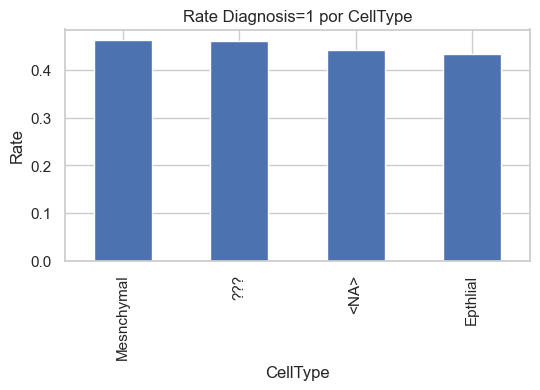

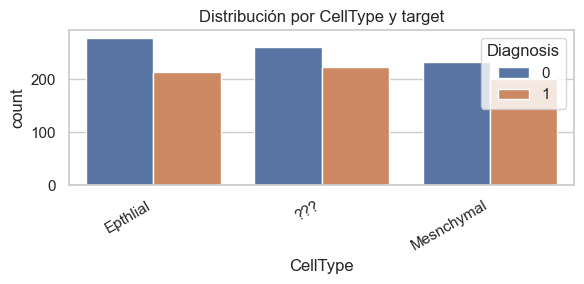


GeneticMutation - value_counts:
GeneticMutation
Presnt    848
Absnt     815
Name: count, dtype: Int64


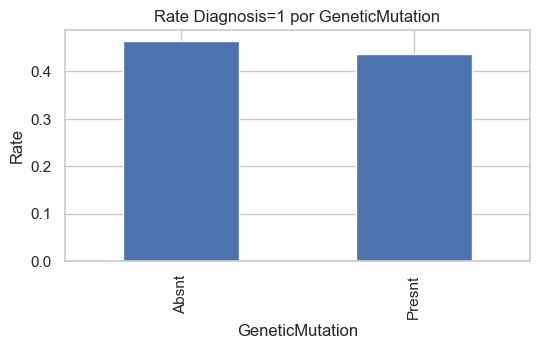

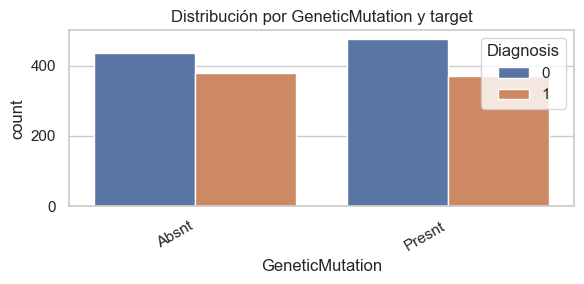

In [6]:
for c in CAT_COLS:
    print(f"\n{c} - value_counts:")
    print(df[c].fillna("Unknown").value_counts())

    # tasa de positivos (Diagnosis==1) por categoría
    rates = df.groupby(c, dropna=False)[TARGET].mean().sort_values(ascending=False)
    ax = rates.plot(kind="bar", figsize=(6,3), title=f"Rate Diagnosis=1 por {c}")
    ax.set_ylabel("Rate")
    plt.show()

    # countplot
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=c, hue=TARGET)
    plt.title(f"Distribución por {c} y target")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
CellSize,1333.0,83.247087,100.316719,-100.000000,66.572149,69.704323,72.653147,1000.000000
CellShape,1347.0,0.598657,0.565438,-1.413038,0.479758,0.498832,0.523018,5.048566
NucleusDensity,1362.0,2.097344,4.987573,-3.000000,1.397010,1.445035,1.485651,50.000000
ChromatinTexture,1366.0,26.094973,24.842157,10.000000,21.279126,22.066810,22.823319,263.793425
CytoplasmSize,1347.0,33.989815,32.809627,5.000000,26.304514,28.448318,30.506774,299.350559
CellAdhesion,1369.0,0.548800,0.612232,-4.461755,0.456400,0.474836,0.494613,5.029925
MitosisRate,1343.0,5.326484,11.572456,-50.000000,2.776731,3.080247,3.423066,100.000000
NuclearMembrane,1343.0,2.825365,2.697956,-3.438990,2.254502,2.414464,2.534339,24.871762
GrowthFactor,1359.0,74.126375,77.819461,-50.000000,58.170436,60.993969,63.041642,563.622684
OxygenSaturation,1375.0,93.199374,82.574244,-10.000000,79.130570,79.987328,80.986905,807.181058


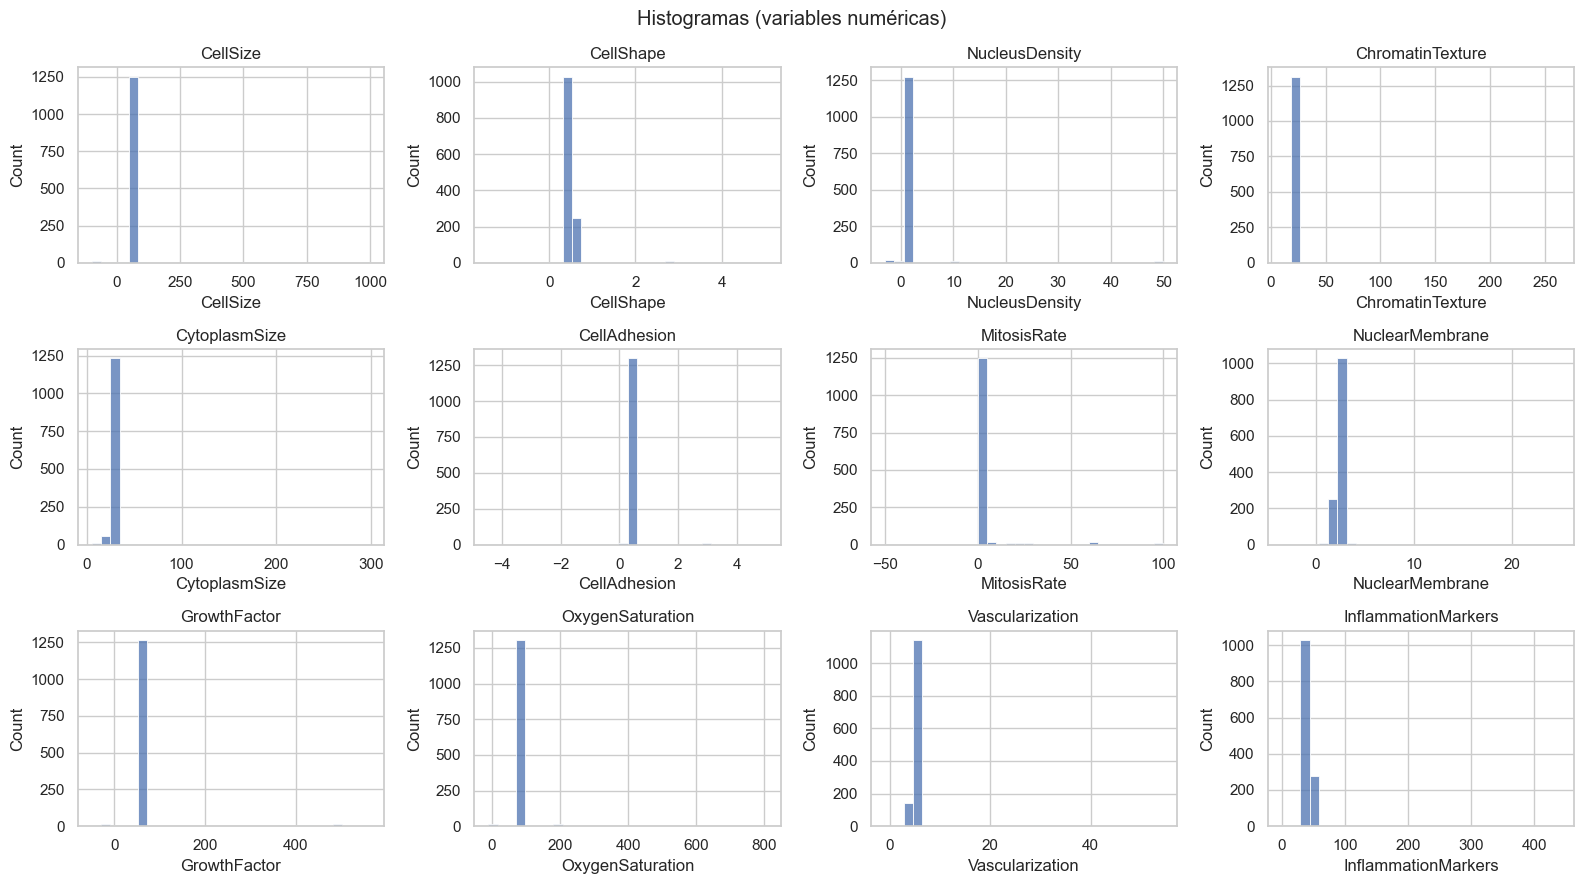

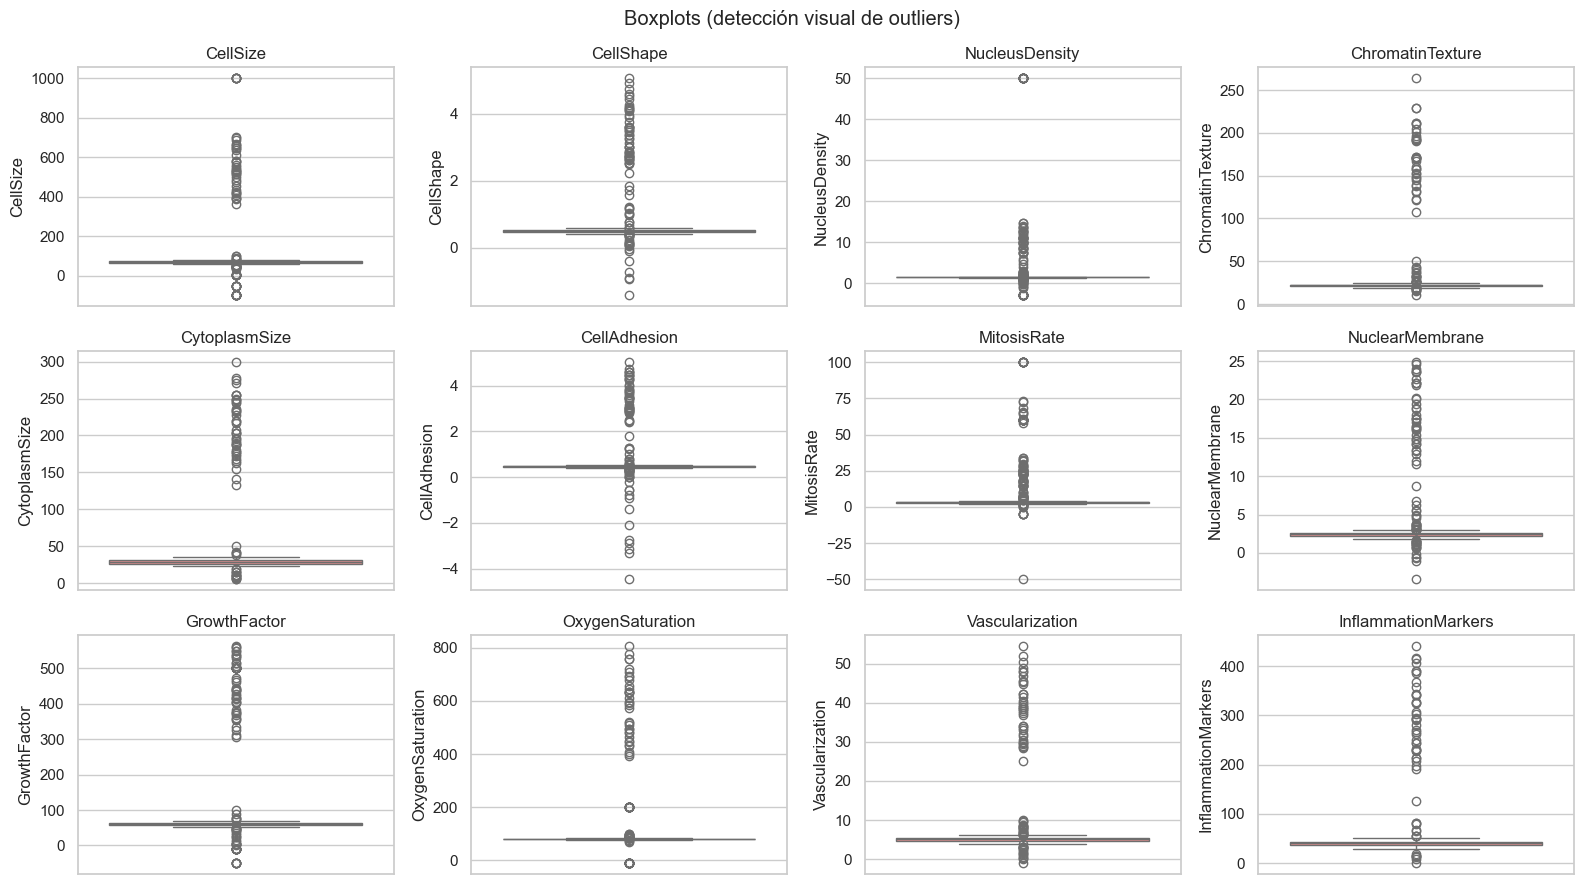

In [7]:
display(df[NUM_COLS].describe().T)

# histogramas
n = len(NUM_COLS)
rows = int(np.ceil(n/4))
fig, axes = plt.subplots(rows, 4, figsize=(16, 3*rows))
axes = axes.flatten()
for i, col in enumerate(NUM_COLS):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=False)
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Histogramas (variables numéricas)")
plt.tight_layout()
plt.show()

# boxplots (para ver outliers)
rows = int(np.ceil(n/4))
fig, axes = plt.subplots(rows, 4, figsize=(16, 3*rows))
axes = axes.flatten()
for i, col in enumerate(NUM_COLS):
    sns.boxplot(y=df[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Boxplots (detección visual de outliers)")
plt.tight_layout()
plt.show()

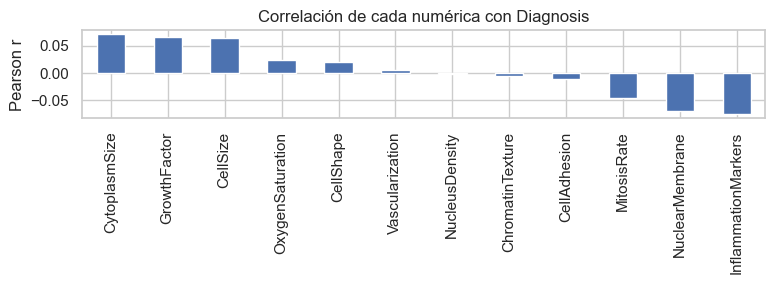

,corr_con_target
CytoplasmSize,0.070
GrowthFactor,0.066
CellSize,0.064
OxygenSaturation,0.024
CellShape,0.020
Vascularization,0.006
NucleusDensity,-0.001
ChromatinTexture,-0.006
CellAdhesion,-0.011
MitosisRate,-0.046


In [8]:
corr = df[NUM_COLS + [TARGET]].corr(numeric_only=True)[TARGET].drop(TARGET).sort_values(ascending=False)
ax = corr.plot(kind="bar", figsize=(8,3), title="Correlación de cada numérica con Diagnosis")
ax.set_ylabel("Pearson r")
plt.tight_layout()
plt.show()

display(corr.to_frame("corr_con_target").round(3))

In [9]:
expected_ranges = {
    "CellAdhesion": (0, 1),
    "NuclearMembrane": (1, 5),
    "OxygenSaturation": (0, 100),
    "Vascularization": (0, 10),
    "InflammationMarkers": (0, 100),
    # si querés agregar límites blandos para otros (ej. tamaño >0), ponelos acá:
    "CellSize": (0, np.inf),
    "CytoplasmSize": (0, np.inf),
    "MitosisRate": (0, np.inf),
}

out_of_range = []
for col, (lo, hi) in expected_ranges.items():
    s = df[col].dropna()
    n_bad = ((s < lo) | (s > hi)).sum()
    if n_bad > 0:
        out_of_range.append((col, int(n_bad)))
pd.DataFrame(out_of_range, columns=["columna", "fuera_de_rango"])

,columna,fuera_de_rango
0,CellAdhesion,57
1,NuclearMembrane,51
2,OxygenSaturation,67
3,Vascularization,38
4,InflammationMarkers,38
5,CellSize,20
6,MitosisRate,6


In [10]:
# imputar nulos en columnas numéricas con la media de cada columna
df_num = df.select_dtypes(include=[float, int])
df[df_num.columns] = df_num.fillna(df_num.mean())

df = pd.get_dummies(df, columns=["CellType", "GeneticMutation"], drop_first=True)

In [11]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"].values  # lo paso a array de numpy

In [12]:
np.random.seed(42)
indices = np.random.permutation(len(X))      # baraja los índices 0..n-1

cut = int(0.8 * len(X))                      # 80% para train
train_idx, val_idx = indices[:cut], indices[cut:]

X_train = X.iloc[train_idx].values           # filas barajadas para train
X_val   = X.iloc[val_idx].values             # filas barajadas para val
y_train = y[train_idx]
y_val   = y[val_idx]

print(f"Train: X_Train = {X_train.shape}, y_Train = {y_train.shape[0]}")
print(f"Validation: X_Val = {X_val.shape}, y_Val = {y_val.shape[0]}")

Train: X_Train = (1330, 15), y_Train = 1330
Validation: X_Val = (333, 15), y_Val = 333


In [13]:
train_df = df.iloc[train_idx].copy()
val_df   = df.iloc[val_idx].copy()

# categóricas: '???' -> 'Unknown'
for c in CAT_COLS:
    if c in train_df:
        train_df[c] = train_df[c].fillna("Unknown").replace("???","Unknown").astype("string")
    if c in val_df.columns:
        val_df[c]   = val_df[c].fillna("Unknown").replace("???","Unknown").astype("string")

num_cols = train_df.select_dtypes(include=[float, int]).columns.drop(TARGET)
num_means = train_df[num_cols].mean()
train_df[num_cols] = train_df[num_cols].fillna(num_means)
val_df[num_cols]   = val_df[num_cols].fillna(num_means)

# 3) One-hot: usar SOLO categorías presentes en train y reindexar val
cat_cols_present = [c for c in CAT_COLS if c in train_df.columns]

X_train_df = train_df.drop(columns=[TARGET])
X_val_df   = val_df.drop(columns=[TARGET])

X_train_df = pd.get_dummies(X_train_df, columns=cat_cols_present, drop_first=True)
X_val_df   = pd.get_dummies(X_val_df,   columns=cat_cols_present, drop_first=True)

# Alinear columnas de VAL a TRAIN (mismas features/orden)
X_val_df = X_val_df.reindex(columns=X_train_df.columns, fill_value=0)

# 4) (Opcional) Z-score con parámetros del TRAIN
mu = X_train_df.mean()
sd = X_train_df.std().replace(0, 1.0)
X_train_df = (X_train_df - mu) / sd
X_val_df   = (X_val_df   - mu) / sd

# 5) Targets y a NumPy (igual que ya hacías)
y_train = train_df[TARGET].astype(int).values
y_val   = val_df[TARGET].astype(int).values
X_train = X_train_df.values
X_val   = X_val_df.values

print(f"Train: X_Train = {X_train.shape}, y_Train = {y_train.shape[0]}")
print(f"Validation: X_Val = {X_val.shape}, y_Val = {y_val.shape[0]}")

Train: X_Train = (1330, 15), y_Train = 1330
Validation: X_Val = (333, 15), y_Val = 333


Mejor λ por F1: 0.000720 | Mejor umbral: 0.4000 | F1(val): 0.7652
Matriz de Confusión:
 [[156  27]
 [ 56  94]]
Accuracy : 0.7508
Precision: 0.7769
Recall   : 0.6267
F1-score : 0.6937


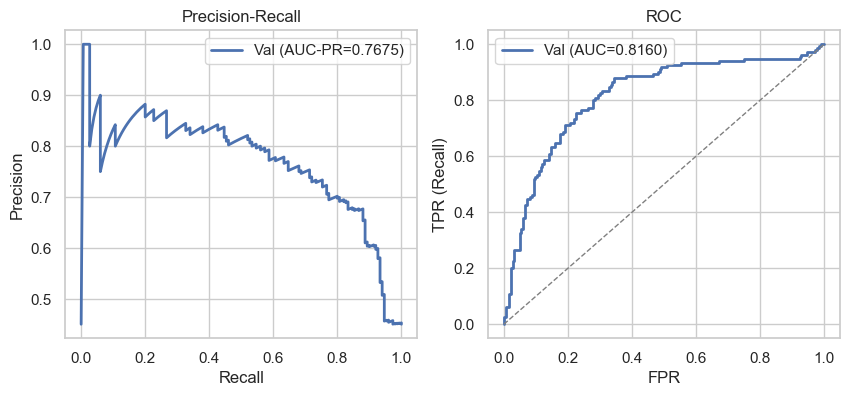

In [14]:
lambdas = np.logspace(-4, 2, 15)

best_f1   = -1.0
best_lam  = None
best_thr  = 0.5
best_model = None

for lam in lambdas:
    model = LogisticRegressionL2(lam=lam, lr=0.1, epochs=4000, tol=1e-7, bias=True, verbose=False).fit(X_train, y_train)

    # scores en VALIDATION
    y_score = model.predict_proba(X_val)

    # elegimos el umbral que maximiza F1 en VALIDATION
    thr, f1_val = best_threshold_for_f1(y_val, y_score)  # <-- función de metrics

    if f1_val > best_f1:
        best_f1, best_lam, best_thr = f1_val, lam, thr
        best_model = model

print(f"Mejor λ por F1: {best_lam:.6f} | Mejor umbral: {best_thr:.4f} | F1(val): {best_f1:.4f}")

# 2) Métricas con threshold 0.5 (podés buscar el threshold que maximiza F1 también)
y_prob = best_model.predict_proba(X_val)
y_hat  = (y_prob >= 0.5).astype(int)

cm  = confusion_matrix(y_val, y_hat)
acc = accuracy(y_val, y_hat)
pre = precision(y_val, y_hat)
rec = recall(y_val, y_hat)
f1  = f1_score(y_val, y_hat)

print("Matriz de Confusión:\n", cm)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# 3) Curvas PR y ROC + AUC
fig, ax = plt.subplots(1,2, figsize=(10,4))
auc_pr  = plot_pr(y_val, y_prob, ax=ax[0], label="Val")
auc_roc = plot_roc(y_val, y_prob, ax=ax[1], label="Val")
plt.show()

Matriz de Confusión (TEST):
 [[92 10]
 [ 9 74]]
Accuracy : 0.8973
Precision: 0.8810
Recall   : 0.8916
F1-score : 0.8862


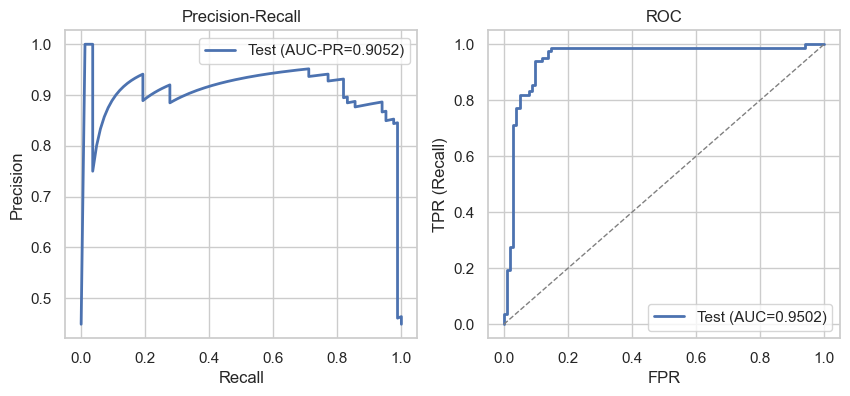

In [15]:
# 1) cargar dev y test
df_dev  = pd.read_csv("data/raw/cell_diagnosis_balanced_dev.csv")
df_test = pd.read_csv("data/raw/cell_diagnosis_balanced_test.csv")

# 2) cleaning liviano (mismos rangos que 1.4)
df_dev  = to_nan_out_of_range(df_dev)
df_test = to_nan_out_of_range(df_test)

# 3) preprocesado: fit en TODO dev y aplicar a dev y test (mismas columnas y z-score)
params         = fit_preprocessor(df_dev)
X_dev,  y_dev  = transform(df_dev,  params)
X_test, y_test = transform(df_test, params)

# 4) entrenar modelo final con TODO el dev usando el λ óptimo del 1.4
model = LogisticRegressionL2(lam=best_lam, lr=0.1, epochs=4000, tol=1e-6, bias=True).fit(X_dev, y_dev)

# 5) predicción en test con el umbral óptimo del 1.4
y_score = model.predict_proba(X_test)
y_pred  = (y_score >= best_thr).astype(int)

# 6) métricas requeridas en TEST
cm, acc, pre, rec, f1 = basic_metrics(y_test, y_pred)
print("Matriz de Confusión (TEST):\n", cm)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Curvas PR y ROC + AUC (por separado, como en 1.4)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
auc_pr  = plot_pr(y_test, y_score, ax=ax[0], label="Test")
auc_roc = plot_roc(y_test, y_score, ax=ax[1], label="Test")
plt.show()

In [16]:
df_imb = pd.read_csv("data/raw/cell_diagnosis_imbalanced_dev.csv")

# mismo cleaning liviano de antes
df_imb = to_nan_out_of_range(df_imb)

# split + preprocesar con tus funciones del 1.3
X_train, y_train, X_val, y_val, pre_params = preprocess_train_val(
    df_imb, test_size=0.2, seed=42, stratify=True
)

In [17]:
lambdas = np.logspace(-4, 2, 15)

results   = []
pr_curves = []
roc_curves = []

# 1) Sin rebalanceo
m0, lam0, thr0, f1_0 = tune_lambda(X_train, y_train, X_val, y_val, lambdas)
r, pr, roc = eval_and_store("Sin rebalanceo", m0, X_val, y_val, thr0)
results += r; pr_curves += pr; roc_curves += roc

# 2) Undersampling
Xu, yu = undersample_majority(X_train, y_train, seed=42)
m1, lam1, thr1, f1_1 = tune_lambda(Xu, yu, X_val, y_val, lambdas)
r, pr, roc = eval_and_store("Undersampling", m1, X_val, y_val, thr1)
results += r; pr_curves += pr; roc_curves += roc

# 3) Oversampling (duplicación)
Xo, yo = oversample_duplicate(X_train, y_train, seed=42)
m2, lam2, thr2, f1_2 = tune_lambda(Xo, yo, X_val, y_val, lambdas)
r, pr, roc = eval_and_store("Oversampling duplicate", m2, X_val, y_val, thr2)
results += r; pr_curves += pr; roc_curves += roc

# 4) Oversampling SMOTE (simple)
Xs, ys = smote_simple(X_train, y_train, seed=42)
m3, lam3, thr3, f1_3 = tune_lambda(Xs, ys, X_val, y_val, lambdas)
r, pr, roc = eval_and_store("Oversampling SMOTE", m3, X_val, y_val, thr3)
results += r; pr_curves += pr; roc_curves += roc

# 5) Cost re-weighting (pesos por clase)
pi1 = (y_train==1).mean()
pi0 = 1.0 - pi1
C   = (pi0 / pi1) if (pi1 > 0 and pi0 > 0) else 1.0
sw  = np.where(y_train==1, C, 1.0)

best_f1, best_lam, best_thr, best_model = -1.0, None, 0.5, None
for lam in lambdas:
    m = LogisticRegressionL2(lam=lam, lr=0.1, epochs=4000, tol=1e-7, bias=True) \
            .fit(X_train, y_train, sample_weight=sw)
    y_score = m.predict_proba(X_val)
    thr, f1_val = best_threshold_for_f1(y_val, y_score)
    if f1_val > best_f1:
        best_f1, best_lam, best_thr, best_model = f1_val, lam, thr, m

r, pr, roc = eval_and_store("Cost re-weighting", best_model, X_val, y_val, best_thr)
results += r; pr_curves += pr; roc_curves += roc


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR
0,Sin rebalanceo,0.893443,0.716049,0.950820,0.816901,0.924214,0.717464
1,Undersampling,0.897541,0.719512,0.967213,0.825175,0.923139,0.704769
2,Oversampling duplicate,0.901639,0.760563,0.885246,0.818182,0.923497,0.712258
3,Oversampling SMOTE,0.897541,0.750000,0.885246,0.812030,0.923229,0.719215
4,Cost re-weighting,0.901639,0.746667,0.918033,0.823529,0.924393,0.715545


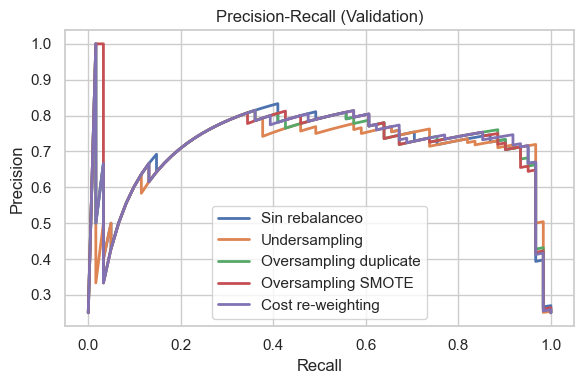

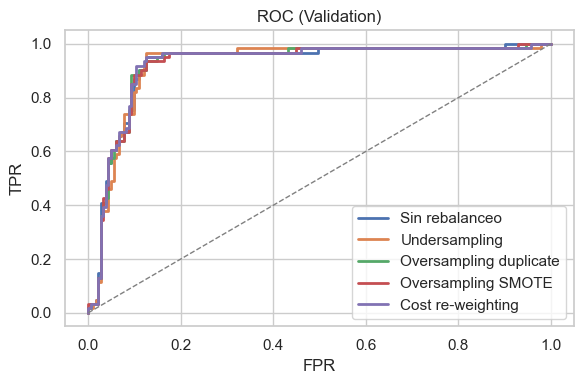

In [18]:
df_res = pd.DataFrame(results, columns=["Modelo","Accuracy","Precision","Recall","F1-Score","AUC-ROC","AUC-PR"])
display(df_res)

# PR en mismo gráfico
plt.figure(figsize=(6,4))
for name, rec, prec in pr_curves:
    plt.plot(rec, prec, lw=2, label=name)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall (Validation)")
plt.legend(); plt.tight_layout(); plt.show()

# ROC en mismo gráfico
plt.figure(figsize=(6,4))
for name, fpr, tpr in roc_curves:
    plt.plot(fpr, tpr, lw=2, label=name)
plt.plot([0,1],[0,1],"--",color="gray",lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (Validation)")
plt.legend(); plt.tight_layout(); plt.show()

,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC,AUC-PR
0,Sin rebalanceo,0.9118,0.8438,0.7941,0.8182,0.9576,0.7986
1,Undersampling,0.8971,0.7941,0.7941,0.7941,0.9198,0.7026
2,Oversampling duplicate,0.8971,0.8333,0.7353,0.7812,0.9550,0.7807
3,Oversampling SMOTE,0.9118,0.8667,0.7647,0.8125,0.9608,0.7965
4,Cost re-weighting,0.7868,0.8571,0.1765,0.2927,0.5848,0.4097


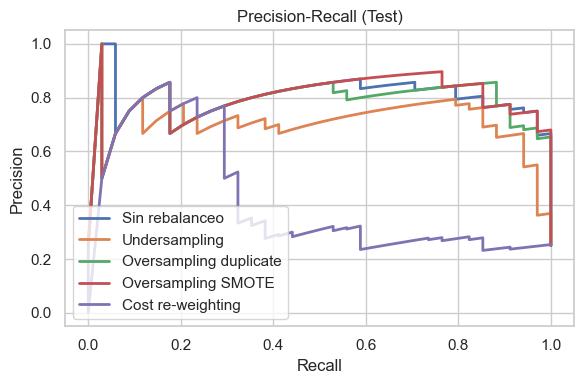

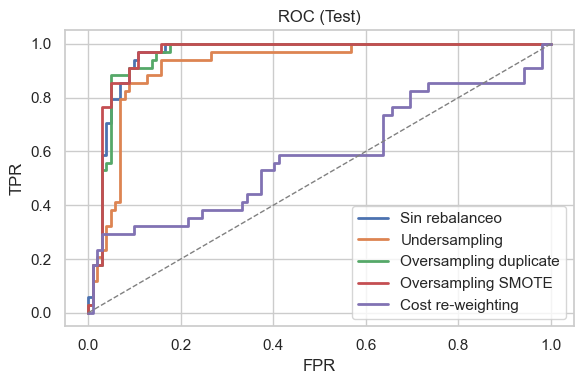

In [20]:
# 1) Cargar TEST desbalanceado y limpiar con mismas reglas “livianas”
df_test_imb = pd.read_csv("data/raw/cell_diagnosis_imbalanced_test.csv")
df_test_imb = to_nan_out_of_range(df_test_imb)  # misma función que usaste antes

# 2) Transformar TEST con *los mismos parámetros* que en 1.6 (one-hot + z-score del TRAIN)
#    OJO: params debe venir de tu 1.6 (no vuelvas a 'fit_preprocessor' acá).
X_test_imb, y_test_imb = transform(df_test_imb, params)

# 3) Armar la lista de modelos a evaluar en test (modelo + umbral elegido en validación)
models_for_test = [
    ("Sin rebalanceo",        m0,     thr0),
    ("Undersampling",         m1,     thr1),
    ("Oversampling duplicate",m2,     thr2),
    ("Oversampling SMOTE",    m3,     thr3),
    ("Cost re-weighting",     m, thr),
]

# 4) Evaluación y recolección de curvas para graficar todas juntas
rows = []
pr_curves, roc_curves = [], []

for name, model, thr in models_for_test:
    y_score = model.predict_proba(X_test_imb)
    y_pred  = (y_score >= thr).astype(int)

    cm, acc, pre, rec, f1 = basic_metrics(y_test_imb, y_pred)
    auc_roc = auc_roc_np(y_test_imb, y_score)
    auc_pr  = auc_pr_np(y_test_imb, y_score)

    rows.append([name, acc, pre, rec, f1, auc_roc, auc_pr])

    # guardo curvas para graficar comparadas
    rec_c, prec_c = pr_curve_np(y_test_imb, y_score)
    fpr_c, tpr_c  = roc_curve_np(y_test_imb, y_score)
    pr_curves.append((name, rec_c, prec_c))
    roc_curves.append((name, fpr_c, tpr_c))

# 5) Tabla de resultados (TEST)
df_test_results = pd.DataFrame(rows, columns=["Modelo","Accuracy","Precision","Recall","F1-Score","AUC-ROC","AUC-PR"])
display(df_test_results.round(4))

# 6) Gráficos PR y ROC comparativos (TEST)
plt.figure(figsize=(6,4))
for name, rec, prec in pr_curves:
    plt.plot(rec, prec, lw=2, label=name)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall (Test)")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
for name, fpr, tpr in roc_curves:
    plt.plot(fpr, tpr, lw=2, label=name)
plt.plot([0,1],[0,1],"--", color="gray", lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (Test)")
plt.legend(); plt.tight_layout(); plt.show()

Regresión Logística con L2 con cost re-weighting porque, en el escenario desbalanceado, obtuvo mejor AUC-PR/F1 con alto recall y comportamiento estable entre validación y test, con baja complejidad operacional. Además, se ajusto el umbral para priorizar sensibilidad clínica y λ quedó tuneado por CV para facilitar recalibraciones.